# ASL Letters (American Sign Language Letters)

This dataset was adopted from the MNIST sign language dataset by converting the CSV file into images and also reducing the overall size of the database.

There is a total of 27,455 grayscale images with a size of 28x28 pixels, ranging in values from 0 to 255. Each image represents a label (0-25) that maps uniquely to each alphabetical letter from A to Z (with no case for 9 = J or 25 = Z due to gesture movements).

The data is stored in an organized manner and is compatible for use with data streaming generators in the TensorFlow API. Each folder is named according to the class of images stored within, facilitating loading and visualization.

The images are stored in JPEG file format.

The original hand gesture image data represented multiple users repeating the gesture with different backgrounds. The sign language MNIST data comes from a larger extension of the small number (1704) of the color images, which were uncropped around the region of interest of the hand.

To create new data, an image pipeline based on ImageMagick was used, involving cropping to hands only, scaling to grayscale, resizing, and then creating at least 50 variations to increase the quantity. The modification and augmentation strategy included filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees of rotation. Due to the small size of the images, these modifications effectively alter the resolution and the separation of interesting and controllable shape classes.

## Downloading the database

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2023-06-13 22:58:18--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  11.1MB/s    in 2.1s    

2023-06-13 22:58:21 (11.1 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



### Next, we will proceed to extract the content from our zip file.


In [2]:
import os
import zipfile

local_zip =  '/tmp/sign-language-img.zip'
zip_ref =  zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/sign-language-img')
zip_ref.close()

Now we can observe that the file comprises two folders, namely 'train' and 'test'. Within these folders, there are subfolders that house the images associated with each letter (ranging from A to Y, excluding J and Z).

### Importing libraries

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Addresses of our training and testing datasets.

In [4]:
train_dir = "/tmp/sign-language-img/Train"
test_dir = "/tmp/sign-language-img/Test"

## Data Generators
Let's set up data generators that will read images from our source folders, convert them into `float32` tensors, and feed them (along with their labels) into our network. We will have one generator for training images and another for validation images. Our generators will produce batches of images sized 28x28 and their corresponding labels (sign language classes).

In [5]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


#### We define the classes of our database
Since we cannot represent J and Z as single images, we will exclude them from our classes.


In [7]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]

In [8]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

## We visualize the data.

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

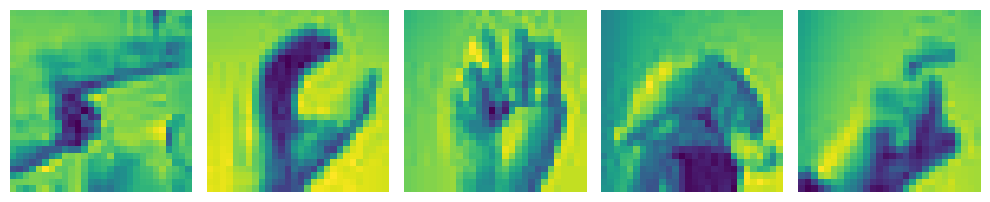

In [ ]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

## We create our base functional model.

In [ ]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


## Training
Let's train for 10 epochs.

In [ ]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator,
    epochs= 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 10s 42ms/step - loss: 2.2258 - accuracy: 0.3496 - val_loss: 1.7545 - val_accuracy: 0.4779
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 1.2704 - accuracy: 0.6113 - val_loss: 1.3658 - val_accuracy: 0.5993
Epoch 3/20
215/215 [==============================] - 7s 30ms/step - loss: 0.9266 - accuracy: 0.7156 - val_loss: 1.1900 - val_accuracy: 0.6330
Epoch 4/20
215/215 [==============================] - 7s 30ms/step - loss: 0.7049 - accuracy: 0.7883 - val_loss: 1.2091 - val_accuracy: 0.6337
Epoch 5/20
215/215 [==============================] - 7s 30ms/step - loss: 0.5502 - accuracy: 0.8379 - val_loss: 1.0772 - val_accuracy: 0.6772
Epoch 6/20
215/215 [==============================] - 8s 36ms/step - loss: 0.4149 - accuracy: 0.8799 - val_loss: 0.9643 - val_accuracy: 0.7207
Epoch 7/20
215/215 [==============================] - 7s 33ms/step - loss: 0.3083 - accuracy: 0.9144 - val_loss: 1.0480 - val_accuracy: 0.706

### We test the model

In [ ]:
results = model_base.evaluate(test_generator)

57/57 [==============================] - 2s 29ms/step - loss: 1.1201 - accuracy: 0.7819


## We generate a class to visualize and analyze the results.


In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()


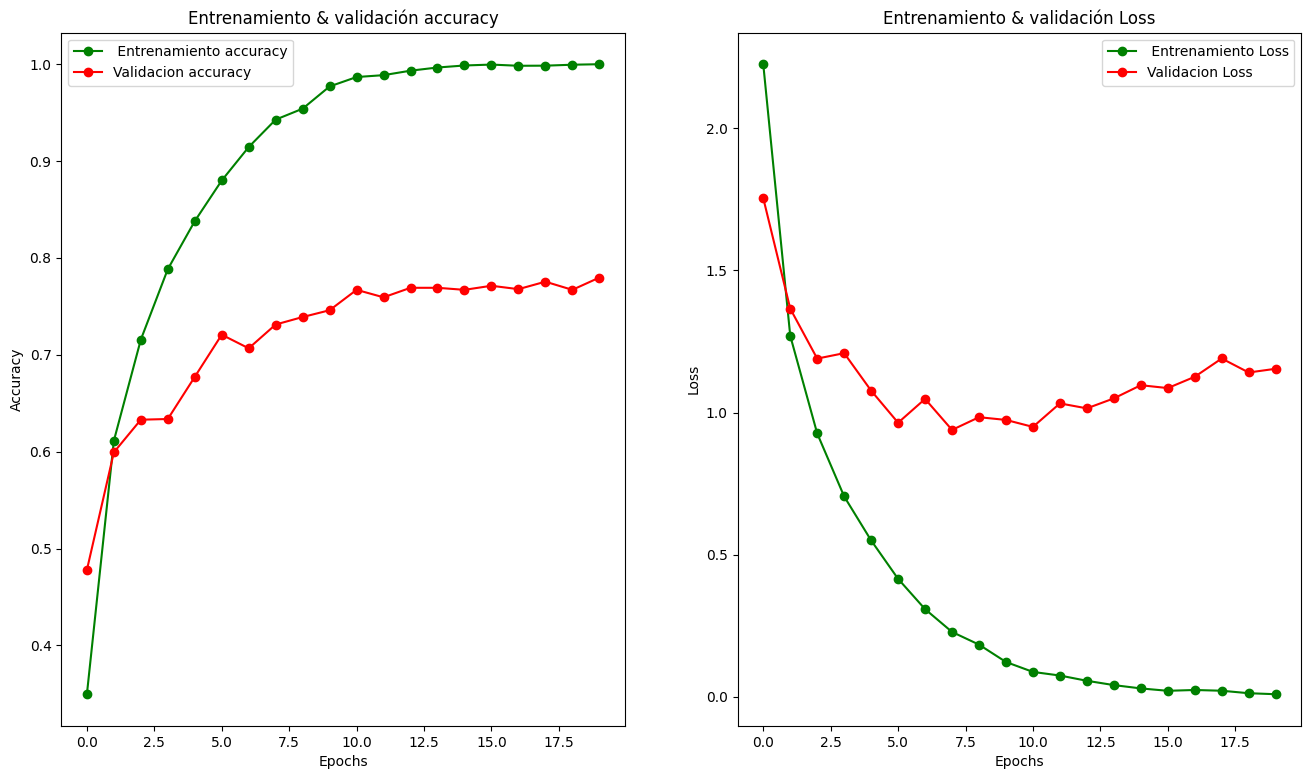

In [ ]:
visualizacion_resultados(history)

According to the graphs, we can observe a clear case of overfitting.

## We create our model with regularizers.

In [9]:
from tensorflow.keras import regularizers

In [ ]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-tr

In [ ]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 8s 35ms/step - loss: 2.4965 - accuracy: 0.2344 - val_loss: 1.8059 - val_accuracy: 0.4491
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 1.5973 - accuracy: 0.4757 - val_loss: 1.3559 - val_accuracy: 0.5677
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 1.2331 - accuracy: 0.5925 - val_loss: 1.2020 - val_accuracy: 0.6070
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.9975 - accuracy: 0.6658 - val_loss: 1.0319 - val_accuracy: 0.6653
Epoch 5/20
215/215 [==============================] - 7s 33ms/step - loss: 0.8369 - accuracy: 0.7188 - val_loss: 0.9752 - val_accuracy: 0.6814
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.7215 - accuracy: 0.7557 - val_loss: 0.9173 - val_accuracy: 0.7018
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.6315 - accuracy: 0.7844 - val_loss: 0.8864 - val_accuracy: 0.7116

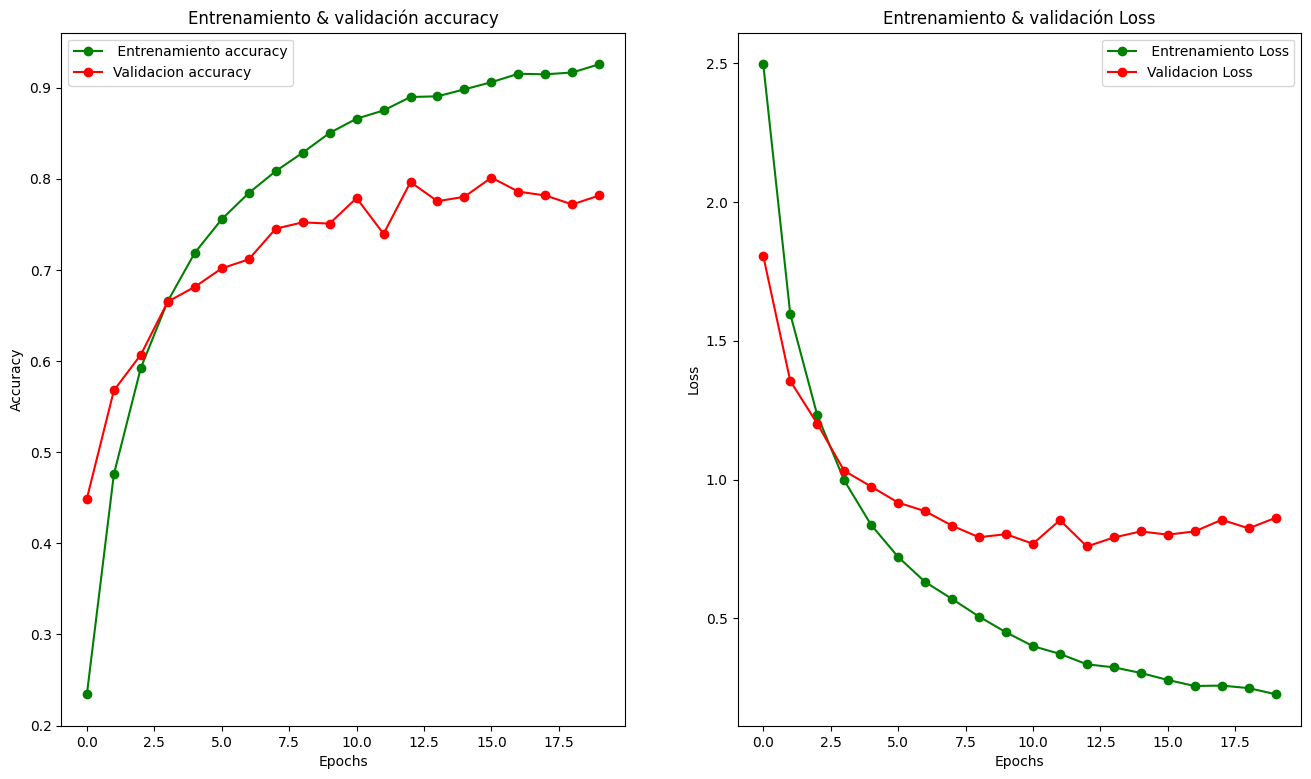

In [ ]:
visualizacion_resultados(history_optimizer)

## We create our model with convolutions

In [ ]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 75)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 12675)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

### Calbacks personalizados

In [ ]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12675)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [10]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print(" We got an accuracy of 95%")
      self.model.stop_training = True


In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 29s 134ms/step - loss: 1.8164 - accuracy: 0.4515 - val_loss: 0.8793 - val_accuracy: 0.7116
Epoch 2/20
215/215 [==============================] - 28s 129ms/step - loss: 0.4362 - accuracy: 0.8684 - val_loss: 0.6219 - val_accuracy: 0.7923
Epoch 3/20
215/215 [==============================] - 27s 128ms/step - loss: 0.1732 - accuracy: 0.9562 - val_loss: 0.5970 - val_accuracy: 0.8379


In [11]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model


## Early stopping

In [ ]:
model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 75)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12675)             0         
                                                                 
 dense (Dense)               (None, 256)               3245056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [12]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [ ]:
history_early = model_early.fit(
    train_generator,
    epochs= 20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 29s 133ms/step - loss: 1.5888 - accuracy: 0.5223 - val_loss: 0.7375 - val_accuracy: 0.7593
Epoch 2/20
215/215 [==============================] - 29s 135ms/step - loss: 0.3192 - accuracy: 0.9115 - val_loss: 0.6073 - val_accuracy: 0.8316
Epoch 3/20
215/215 [==============================] - 28s 129ms/step - loss: 0.1245 - accuracy: 0.9733 - val_loss: 0.6283 - val_accuracy: 0.8351
Epoch 4/20
215/215 [==============================] - 29s 133ms/step - loss: 0.0746 - accuracy: 0.9881 - val_loss: 0.6329 - val_accuracy: 0.8400
Epoch 5/20
215/215 [==============================] - 28s 131ms/step - loss: 0.0562 - accuracy: 0.9928 - val_loss: 0.6676 - val_accuracy: 0.8400
Epoch 6/20
215/215 [==============================] - 27s 126ms/step - loss: 0.0475 - accuracy: 0.9947 - val_loss: 0.6485 - val_accuracy: 0.8596
Epoch 7/20
215/215 [==============================] - 28s 130ms/step - loss: 0.0422 - accuracy: 0.9958 - val_loss: 0.7494 - val_ac

## We create our functional model with Keras AutoTuner.

In [12]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 14.4 MB/s eta 0:00:00


<ipython-input-12-0703c731f7cf>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [13]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation= "relu", input_shape = (28, 28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 20,
    factor = 3,
    directory = "models/",
    project_name = "platzi-tunner"
)

In [ ]:
tuner.search(train_generator, epochs =20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials =1)[0]

Trial 30 Complete [00h 05m 02s]
val_accuracy: 0.8280701637268066

Best val_accuracy So Far: 0.88210529088974
Total elapsed time: 00h 54m 40s


In [ ]:
print(best_hps.get("units"))

320


In [ ]:
print(best_hps.get("learning_rate"))

0.01


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator)

Epoch 1/20
215/215 [==============================] - 13s 52ms/step - loss: 1.3010 - accuracy: 0.6106 - val_loss: 0.7315 - val_accuracy: 0.7979
Epoch 2/20
215/215 [==============================] - 12s 54ms/step - loss: 0.2061 - accuracy: 0.9513 - val_loss: 0.8222 - val_accuracy: 0.8309
Epoch 3/20
215/215 [==============================] - 11s 53ms/step - loss: 0.1463 - accuracy: 0.9749 - val_loss: 1.0423 - val_accuracy: 0.8098
Epoch 4/20
215/215 [==============================] - 11s 53ms/step - loss: 0.1311 - accuracy: 0.9820 - val_loss: 1.0228 - val_accuracy: 0.8182
Epoch 5/20
215/215 [==============================] - 11s 53ms/step - loss: 0.1367 - accuracy: 0.9823 - val_loss: 0.9535 - val_accuracy: 0.8449
Epoch 6/20
215/215 [==============================] - 11s 53ms/step - loss: 0.1433 - accuracy: 0.9803 - val_loss: 1.0271 - val_accuracy: 0.8274
Epoch 7/20
215/215 [==============================] - 11s 53ms/step - loss: 0.1537 - accuracy: 0.9812 - val_loss: 1.3933 - val_accuracy:

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential_1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_1_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

In [ ]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12675)             0         
                                                                 
 dense_3 (Dense)             (None, 320)               4056320   
                                                                 
 dropout_2 (Dropout)         (None, 320)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               41088     
                                                      

## References for storing the architecture.
* https://www.tensorflow.org/guide/keras/save_and_serialize#architecture-only_saving
* https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

## Save and load only the weights
### Train the model with checkpoints.

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
model_weight = get_model()
model_weight.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 75)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12675)             0         
                                                                 
 dense (Dense)               (None, 256)               3245056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [ ]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# We create some checkpoint of our models with TensorFlow, verbose: show more information
checkpoint_path = "model_checpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1)


In [ ]:
# We train the model, and store in each step the weights of the models.
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)


Epoch 1/20
214/215 [============================>.] - ETA: 0s - loss: 1.7482 - accuracy: 0.4718
Epoch 1: saving model to model_checpoints/checkpoint
215/215 [==============================] - 13s 54ms/step - loss: 1.7437 - accuracy: 0.4732 - val_loss: 0.8389 - val_accuracy: 0.7319
Epoch 2/20
214/215 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.8669
Epoch 2: saving model to model_checpoints/checkpoint
215/215 [==============================] - 11s 53ms/step - loss: 0.4359 - accuracy: 0.8671 - val_loss: 0.6100 - val_accuracy: 0.8063
Epoch 3/20
215/215 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9553
Epoch 3: saving model to model_checpoints/checkpoint
215/215 [==============================] - 12s 58ms/step - loss: 0.1746 - accuracy: 0.9553 - val_loss: 0.5830 - val_accuracy: 0.8302
Epoch 4/20
214/215 [============================>.] - ETA: 0s - loss: 0.0980 - accuracy: 0.9797
Epoch 4: saving model to model_checpoints/checkpoint
215/2

#### We create the architecture and load the weights

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)

In [ ]:
model_weights2.evaluate(test_generator)

57/57 [==============================] - 3s 46ms/step - loss: 0.6809 - accuracy: 0.8707


[0.6808578968048096, 0.8707473278045654]

In [ ]:
model_weight.evaluate(test_generator)

57/57 [==============================] - 3s 44ms/step - loss: 0.6809 - accuracy: 0.8707


[0.6808579564094543, 0.8707473278045654]

## Criteria for storing models

#### Storing infrastructure and weight

In [ ]:
checkpoint_path = "model_checpoints_complete"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1

)

In [ ]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

Epoch 1/20
214/215 [============================>.] - ETA: 0s - loss: 2.0855 - accuracy: 0.3612
Epoch 1: val_accuracy improved from -inf to 0.72140, saving model to model_checpoints_complete


215/215 [==============================] - 14s 60ms/step - loss: 2.0808 - accuracy: 0.3623 - val_loss: 0.9905 - val_accuracy: 0.7214
Epoch 2/20
215/215 [==============================] - ETA: 0s - loss: 0.6293 - accuracy: 0.7978
Epoch 2: val_accuracy improved from 0.72140 to 0.77333, saving model to model_checpoints_complete


215/215 [==============================] - 13s 58ms/step - loss: 0.6293 - accuracy: 0.7978 - val_loss: 0.7195 - val_accuracy: 0.7733
Epoch 3/20
215/215 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.9143
Epoch 3: val_accuracy improved from 0.77333 to 0.81965, saving model to model_checpoints_complete


215/215 [==============================] - 13s 58ms/step - loss: 0.2923 - accuracy: 0.9143 - val_loss: 0.6110 - val_accuracy: 0.8196
Epoch 4/20
214/215 [============================>.] - ETA: 0s - loss: 0.1670 - accuracy: 0.9565
Epoch 4: val_accuracy did not improve from 0.81965
215/215 [==============================] - 12s 54ms/step - loss: 0.1666 - accuracy: 0.9566 - val_loss: 0.6203 - val_accuracy: 0.8189
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9739
Epoch 5: val_accuracy improved from 0.81965 to 0.83579, saving model to model_checpoints_complete


215/215 [==============================] - 13s 59ms/step - loss: 0.1121 - accuracy: 0.9739 - val_loss: 0.6138 - val_accuracy: 0.8358
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0859 - accuracy: 0.9822
Epoch 6: val_accuracy improved from 0.83579 to 0.83789, saving model to model_checpoints_complete


215/215 [==============================] - 12s 58ms/step - loss: 0.0859 - accuracy: 0.9822 - val_loss: 0.5990 - val_accuracy: 0.8379
Epoch 7/20
214/215 [============================>.] - ETA: 0s - loss: 0.0731 - accuracy: 0.9850
Epoch 7: val_accuracy did not improve from 0.83789
215/215 [==============================] - 11s 52ms/step - loss: 0.0732 - accuracy: 0.9850 - val_loss: 0.6439 - val_accuracy: 0.8281
Epoch 8/20
215/215 [==============================] - ETA: 0s - loss: 0.0644 - accuracy: 0.9874
Epoch 8: val_accuracy did not improve from 0.83789
215/215 [==============================] - 11s 52ms/step - loss: 0.0644 - accuracy: 0.9874 - val_loss: 0.6598 - val_accuracy: 0.8372
Epoch 9/20
215/215 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9903
Epoch 9: val_accuracy did not improve from 0.83789
215/215 [==============================] - 12s 54ms/step - loss: 0.0577 - accuracy: 0.9903 - val_loss: 0.6897 - val_accuracy: 0.8267
Epoch 10/20
215/215 [======

215/215 [==============================] - 13s 58ms/step - loss: 0.0554 - accuracy: 0.9906 - val_loss: 0.7070 - val_accuracy: 0.8456
Epoch 11/20
214/215 [============================>.] - ETA: 0s - loss: 0.0528 - accuracy: 0.9917
Epoch 11: val_accuracy did not improve from 0.84561
215/215 [==============================] - 11s 53ms/step - loss: 0.0527 - accuracy: 0.9917 - val_loss: 0.7658 - val_accuracy: 0.8309
Epoch 12/20
214/215 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9932
Epoch 12: val_accuracy did not improve from 0.84561
215/215 [==============================] - 11s 53ms/step - loss: 0.0468 - accuracy: 0.9933 - val_loss: 0.6782 - val_accuracy: 0.8393
Epoch 13/20
214/215 [============================>.] - ETA: 0s - loss: 0.0443 - accuracy: 0.9935
Epoch 13: val_accuracy did not improve from 0.84561
215/215 [==============================] - 11s 53ms/step - loss: 0.0442 - accuracy: 0.9936 - val_loss: 0.6966 - val_accuracy: 0.8435
Epoch 14/20
214/215 [

215/215 [==============================] - 13s 59ms/step - loss: 0.0424 - accuracy: 0.9946 - val_loss: 0.7810 - val_accuracy: 0.8554
Epoch 16/20
215/215 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9930
Epoch 16: val_accuracy improved from 0.85544 to 0.85965, saving model to model_checpoints_complete


215/215 [==============================] - 13s 60ms/step - loss: 0.0445 - accuracy: 0.9930 - val_loss: 0.7017 - val_accuracy: 0.8596
Epoch 17/20
215/215 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9941
Epoch 17: val_accuracy did not improve from 0.85965
215/215 [==============================] - 12s 55ms/step - loss: 0.0422 - accuracy: 0.9941 - val_loss: 0.7579 - val_accuracy: 0.8456
Epoch 18/20
215/215 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9941
Epoch 18: val_accuracy did not improve from 0.85965
215/215 [==============================] - 11s 53ms/step - loss: 0.0418 - accuracy: 0.9941 - val_loss: 0.7730 - val_accuracy: 0.8421
Epoch 19/20
215/215 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9958
Epoch 19: val_accuracy did not improve from 0.85965
215/215 [==============================] - 12s 58ms/step - loss: 0.0387 - accuracy: 0.9958 - val_loss: 0.8293 - val_accuracy: 0.8477
Epoch 20/20
215/215 [

#### Store our complete model

In [ ]:
model_complete.save("saved_model_complete/mymodel")

#### Load our complete model

In [ ]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [ ]:
model_complete3.evaluate(test_generator)

57/57 [==============================] - 3s 46ms/step - loss: 0.7463 - accuracy: 0.8585


[0.7463151216506958, 0.8584774136543274]

In [ ]:
model_complete.evaluate(test_generator)

57/57 [==============================] - 3s 45ms/step - loss: 0.7463 - accuracy: 0.8585


[0.7463153004646301, 0.8584774136543274]

#### Use the .h5 format to store models
Hierarchical Data Format (HDF5 format)

In [16]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model_complete3.save("my_model.h5")

In [ ]:
model_complete4 = tf.keras.models.load_model("my_model.h5")

## Creating our pre-trained model using Keras models
#### Preprocessing our database
We need to review the input of our models (input tensor size).

In [15]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_1[0][0]']               
 alization)                                                                                       
                      

#### Freezing the model
We freeze the model up to the mixed 7 layer to add our output layers.

In [17]:
last_layers= pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

In [18]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation= "softmax")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [19]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 50s 162ms/step - loss: 0.1430 - accuracy: 0.9601 - val_loss: 0.0811 - val_accuracy: 0.9733
Epoch 2/5
215/215 [==============================] - 40s 186ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 3/5
215/215 [==============================] - 34s 157ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0333 - val_accuracy: 0.9881
Epoch 4/5
215/215 [==============================] - 36s 166ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0425 - val_accuracy: 0.9860
Epoch 5/5
215/215 [==============================] - 35s 162ms/step - loss: 4.0908e-04 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9874


In [20]:
results = model_keras.evaluate(test_generator_resize)

57/57 [==============================] - 9s 160ms/step - loss: 0.0478 - accuracy: 0.9865


## Creating our pre-trained model using models from TensorFlow Hub

In [18]:
import tensorflow_hub as hub

In [19]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

model_hub = tf.keras.Sequential([
                                 tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
                                 hub.KerasLayer(module_url, trainable=False),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation ="relu"),
                                 tf.keras.layers.Dropout(rate=0.2),
                                 tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_hub.build((None, 150, 150, 3))
model_hub.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1343049   
                                                                 
 flatten_1 (Flatten)         (None, 1001)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               128256    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 24)                3096      
                                                                 
Total params: 1,474,401
Trainable params: 131,352
Non-trainable params: 1,343,049
_________________________________________________________________


In [23]:
model_hub.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_hub = model_hub.fit(
    train_generator_resize,
    epochs= 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 39s 162ms/step - loss: 1.8129 - accuracy: 0.4530 - val_loss: 1.0245 - val_accuracy: 0.6660
Epoch 2/5
215/215 [==============================] - 30s 139ms/step - loss: 0.8581 - accuracy: 0.7132 - val_loss: 0.6939 - val_accuracy: 0.7607
Epoch 3/5
215/215 [==============================] - 30s 141ms/step - loss: 0.6109 - accuracy: 0.7967 - val_loss: 0.5610 - val_accuracy: 0.7979
Epoch 4/5
215/215 [==============================] - 30s 141ms/step - loss: 0.4964 - accuracy: 0.8325 - val_loss: 0.5124 - val_accuracy: 0.8056
Epoch 5/5
215/215 [==============================] - 31s 145ms/step - loss: 0.4156 - accuracy: 0.8602 - val_loss: 0.4895 - val_accuracy: 0.8302


In [24]:
results = model_hub.evaluate(test_generator_resize)

57/57 [==============================] - 7s 130ms/step - loss: 0.4923 - accuracy: 0.8259


## Connecting to TensorBoard

In [20]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [21]:
model_tensorboard = get_model()
model_tensorboard.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [22]:
callback_tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [26]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [29]:
history_tensorboard = model_tensorboard.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_tensorboard],
    validation_data = validation_generator
)

Epoch 1/20


AttributeError: ignored

#### Running our TensorBoard with magic commands
It can be visualized from Google Colab or from the terminal.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Comportamos los resultados con el mundo entero
Mayor información ingresa sobre Tensorflow.dev [aquí](https://tensorboard.dev/)

In [ ]:
!tensorboard dev upload --logdir ./logs --name "Proyecto de lenguaje de señas " --description "Estos son los resultados del entrenamiento" --one_shot